We have chosen to work on a datset regarding heart attack predictions in Indonesia. The dataset was obtained from Kaggle and spans 158355 observations. We have loaded the dataset and explored some summary statistics and correlations. Furthermore, missing values were handled and variables transformed to make working with the data easier.

In [27]:
# from google.colab import drive
# drive.mount('/content/drive')

In [28]:
# import os
# os.chdir('/content/drive/MyDrive/code turing')

In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv("heart_attack_prediction_indonesia.csv")
df.loc[:,['gender', 'region', 'income_level', 'smoking_status', 'alcohol_consumption', 'physical_activity', 'dietary_habits', 'air_pollution_exposure', 'stress_level', 'EKG_results']]

,gender,region,income_level,smoking_status,alcohol_consumption,physical_activity,dietary_habits,air_pollution_exposure,stress_level,EKG_results
0,Male,Rural,Middle,Never,NaN,High,Unhealthy,Moderate,Moderate,Normal
1,Female,Urban,Low,Past,NaN,Moderate,Healthy,High,High,Normal
2,Female,Urban,Low,Past,Moderate,Moderate,Healthy,Low,Low,Abnormal
3,Male,Urban,Low,Never,Moderate,Moderate,Unhealthy,Low,High,Normal
4,Male,Urban,Middle,Current,Moderate,Moderate,Unhealthy,High,Moderate,Normal
...,...,...,...,...,...,...,...,...,...,...
158350,Female,Rural,Middle,Never,NaN,High,Healthy,Moderate,High,Normal
158351,Female,Urban,Low,Never,NaN,Moderate,Healthy,High,High,Normal
158352,Male,Urban,Middle,Past,Moderate,Low,Healthy,Low,Moderate,Abnormal
158353,Male,Urban,Middle,Past,NaN,Low,Unhealthy,High,High,Normal


In [31]:
display(df.describe())
df.info()

,age,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
count,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000
mean,54.543778,0.299069,0.199804,199.533264,0.249901,93.268504,0.300218,6.480064,129.515772,79.490809,110.736762,49.491478,129.569916,149.715885,0.200575,0.499770,0.601029,0.401004
std,11.910897,0.457851,0.399854,39.737565,0.432957,16.382205,0.458354,1.425398,15.005641,10.002964,27.673445,9.982634,34.913318,49.023473,0.400432,0.500002,0.489688,0.490103
min,25.000000,0.000000,0.000000,100.000000,0.000000,20.000000,0.000000,3.000000,61.000000,37.000000,70.000000,8.000000,-19.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,172.000000,0.000000,82.000000,0.000000,5.492985,119.000000,73.000000,89.000000,43.000000,106.000000,116.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,199.000000,0.000000,93.000000,0.000000,6.507461,130.000000,80.000000,109.000000,49.000000,130.000000,149.000000,0.000000,0.000000,1.000000,0.000000
75%,63.000000,1.000000,0.000000,226.000000,0.000000,104.000000,1.000000,7.520640,140.000000,86.000000,130.000000,56.000000,153.000000,183.000000,0.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000,350.000000,1.000000,173.000000,1.000000,9.000000,199.000000,127.000000,230.000000,93.000000,282.000000,380.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

In [32]:
# alcohol consumption of "None" is recognized as N/A so fill this back in
print(df['alcohol_consumption'].value_counts())

df = df.fillna("None")
df.info()

alcohol_consumption
Moderate    47725
High        15782
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 

Encode the variables that have object-type variables

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

categorical_columns = df.select_dtypes(include=['object']).columns
print(f"Categorical Columns: {list(categorical_columns)}")

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Loop through categorical columns and encode them
for col in categorical_columns:
    unique_values = df[col].nunique()
    
    if unique_values == 2:  # Binary Encoding (0/1)
        df[col] = label_encoder.fit_transform(df[col])
    else:  # One-Hot Encoding for more than 2 categories
        one_hot = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, one_hot], axis=1)  # Append one-hot columns
        df.drop(columns=[col], inplace=True)  # Drop original column

df.columns
df

Categorical Columns: []


Index(['age', 'gender', 'region', 'hypertension', 'diabetes',
       'cholesterol_level', 'obesity', 'waist_circumference', 'family_history',
       'dietary_habits', 'sleep_hours', 'blood_pressure_systolic',
       'blood_pressure_diastolic', 'fasting_blood_sugar', 'cholesterol_hdl',
       'cholesterol_ldl', 'triglycerides', 'EKG_results',
       'previous_heart_disease', 'medication_usage',
       'participated_in_free_screening', 'heart_attack', 'income_level_High',
       'income_level_Low', 'income_level_Middle', 'smoking_status_Current',
       'smoking_status_Never', 'smoking_status_Past',
       'alcohol_consumption_High', 'alcohol_consumption_Moderate',
       'alcohol_consumption_None', 'physical_activity_High',
       'physical_activity_Low', 'physical_activity_Moderate',
       'air_pollution_exposure_High', 'air_pollution_exposure_Low',
       'air_pollution_exposure_Moderate', 'stress_level_High',
       'stress_level_Low', 'stress_level_Moderate'],
      dtype='object')

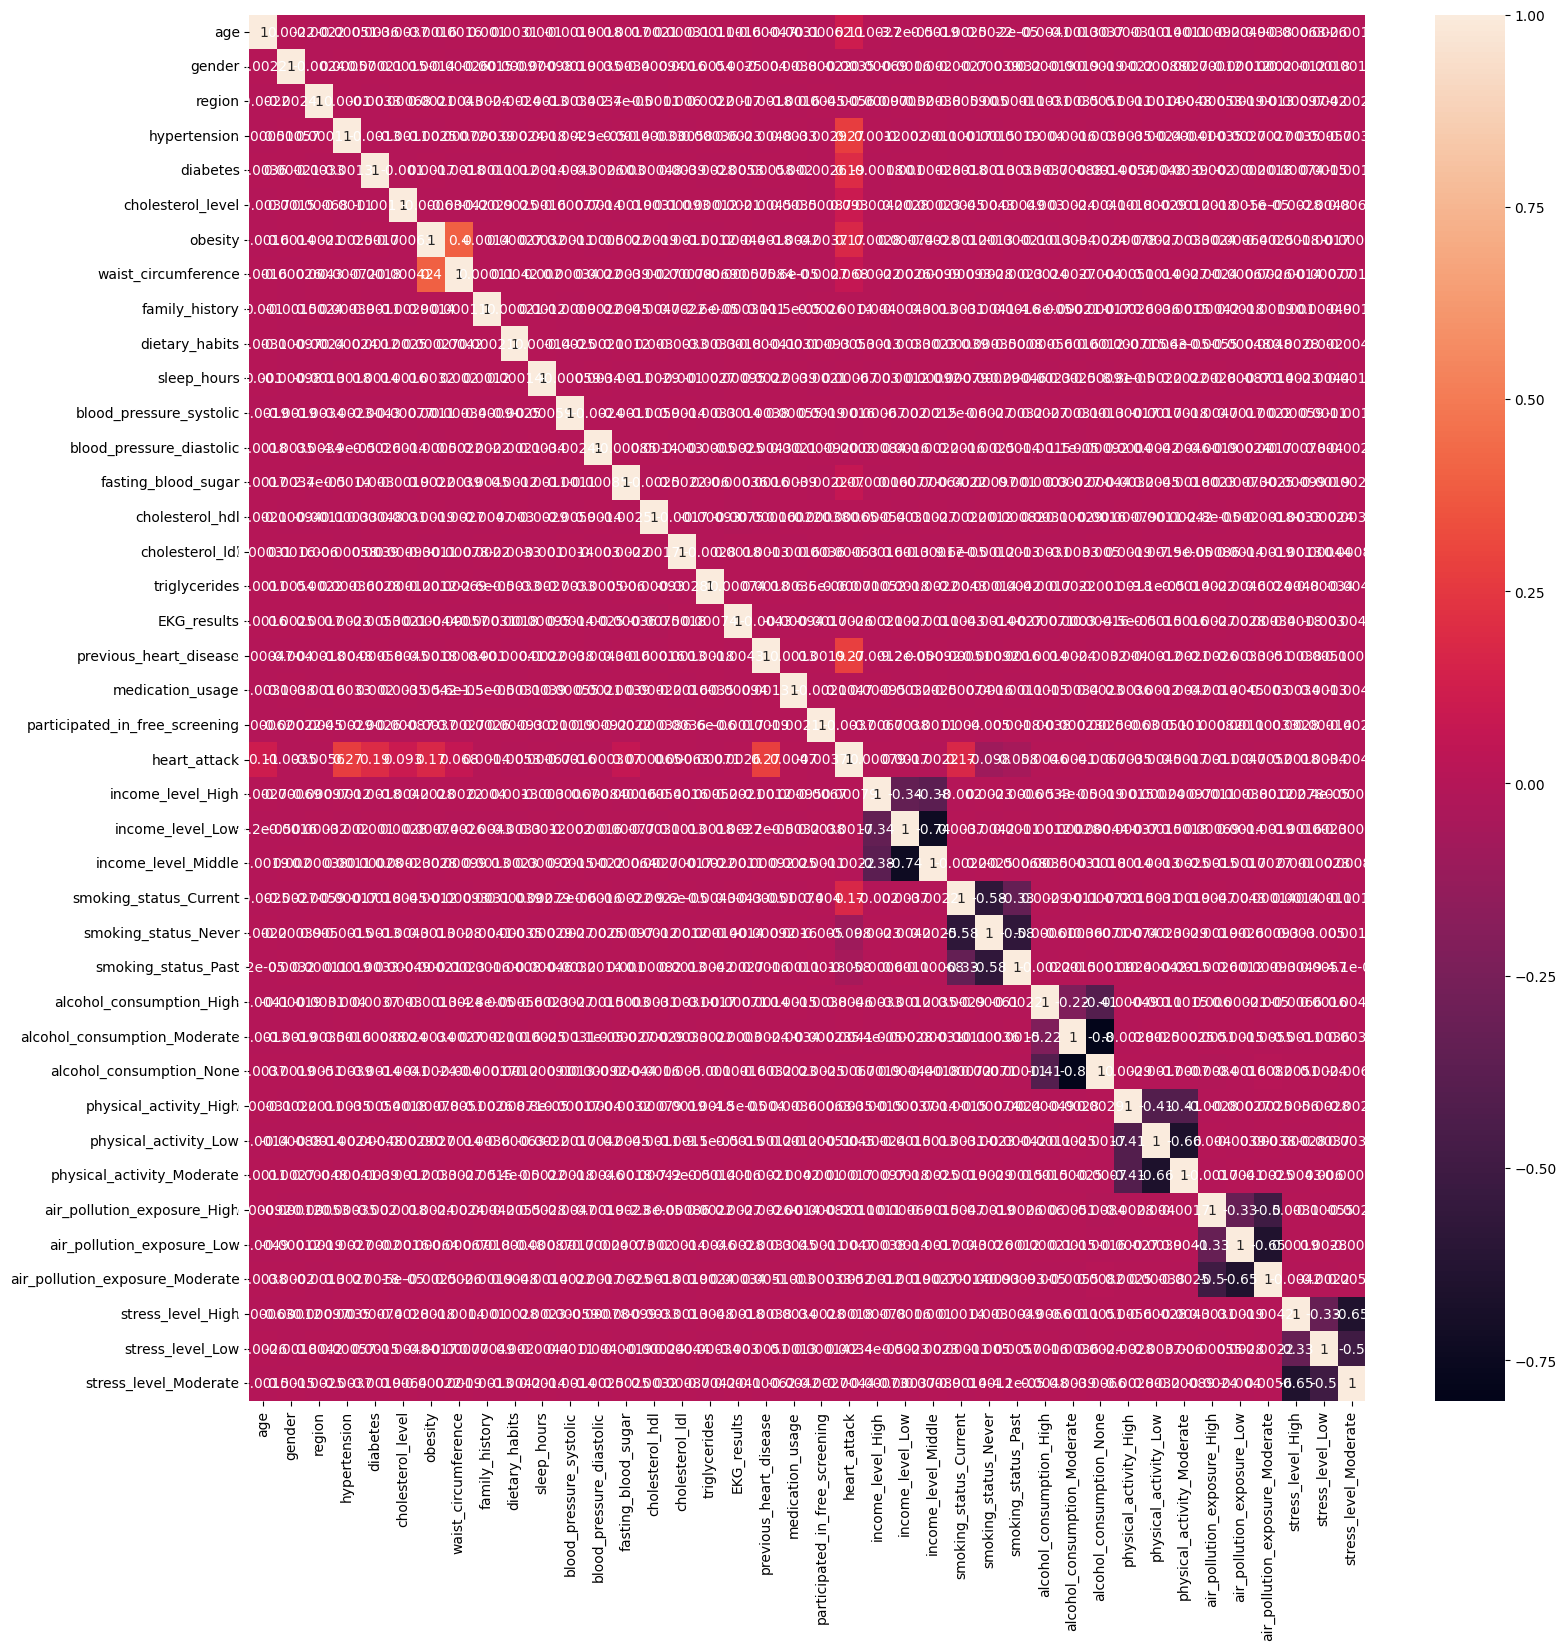

In [34]:
plt.figure(figsize = (18, 18))
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.show()

(array([94854.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 63501.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

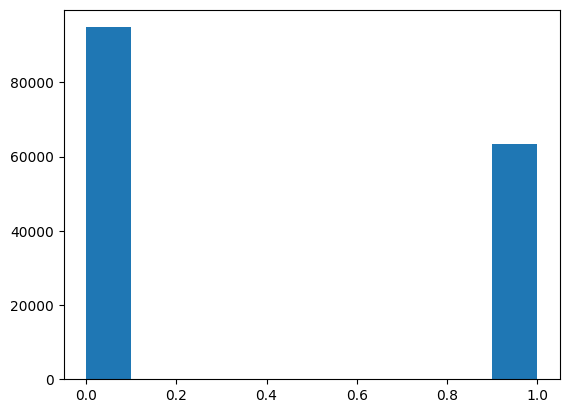

In [35]:
plt.hist(df['heart_attack'])

In [36]:
for col in df.select_dtypes(exclude=['number']).columns:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts())
    print("-" * 30)

Value counts for 'income_level_High':
income_level_High
False    134652
True      23703
Name: count, dtype: int64
------------------------------
Value counts for 'income_level_Low':
income_level_Low
False    94933
True     63422
Name: count, dtype: int64
------------------------------
Value counts for 'income_level_Middle':
income_level_Middle
False    87125
True     71230
Name: count, dtype: int64
------------------------------
Value counts for 'smoking_status_Current':
smoking_status_Current
False    118584
True      39771
Name: count, dtype: int64
------------------------------
Value counts for 'smoking_status_Never':
smoking_status_Never
True     79183
False    79172
Name: count, dtype: int64
------------------------------
Value counts for 'smoking_status_Past':
smoking_status_Past
False    118954
True      39401
Name: count, dtype: int64
------------------------------
Value counts for 'alcohol_consumption_High':
alcohol_consumption_High
False    142573
True      15782
Name: count,

In [37]:
# transform non-numerical variables into simple numerical ones
never_past_current = {'Never': 0, 'Past': 1, 'Current': 2}
none_moderate_high = {'None': 0, 'Moderate': 1, 'High': 2}
low_middle_high = {'Low': 1, 'Middle': 2, 'High': 3}
low_moderate_high = {'Low': 1, 'Moderate': 2, 'High': 3}

df['income_level_transformed'] = df['income_level'].map(low_middle_high)
df['alcohol_consumption_transformed'] = df['alcohol_consumption'].map(none_moderate_high)
df['smoking_status_transformed'] = df['smoking_status'].map(never_past_current)
df['physical_activity_transformed'] = df['physical_activity'].map(low_moderate_high)
df['air_pollution_exposure_transformed'] = df['air_pollution_exposure'].map(low_moderate_high)
df['stress_level_transformed'] = df['stress_level'].map(low_moderate_high)

display(df.describe())

KeyError: 'income_level'

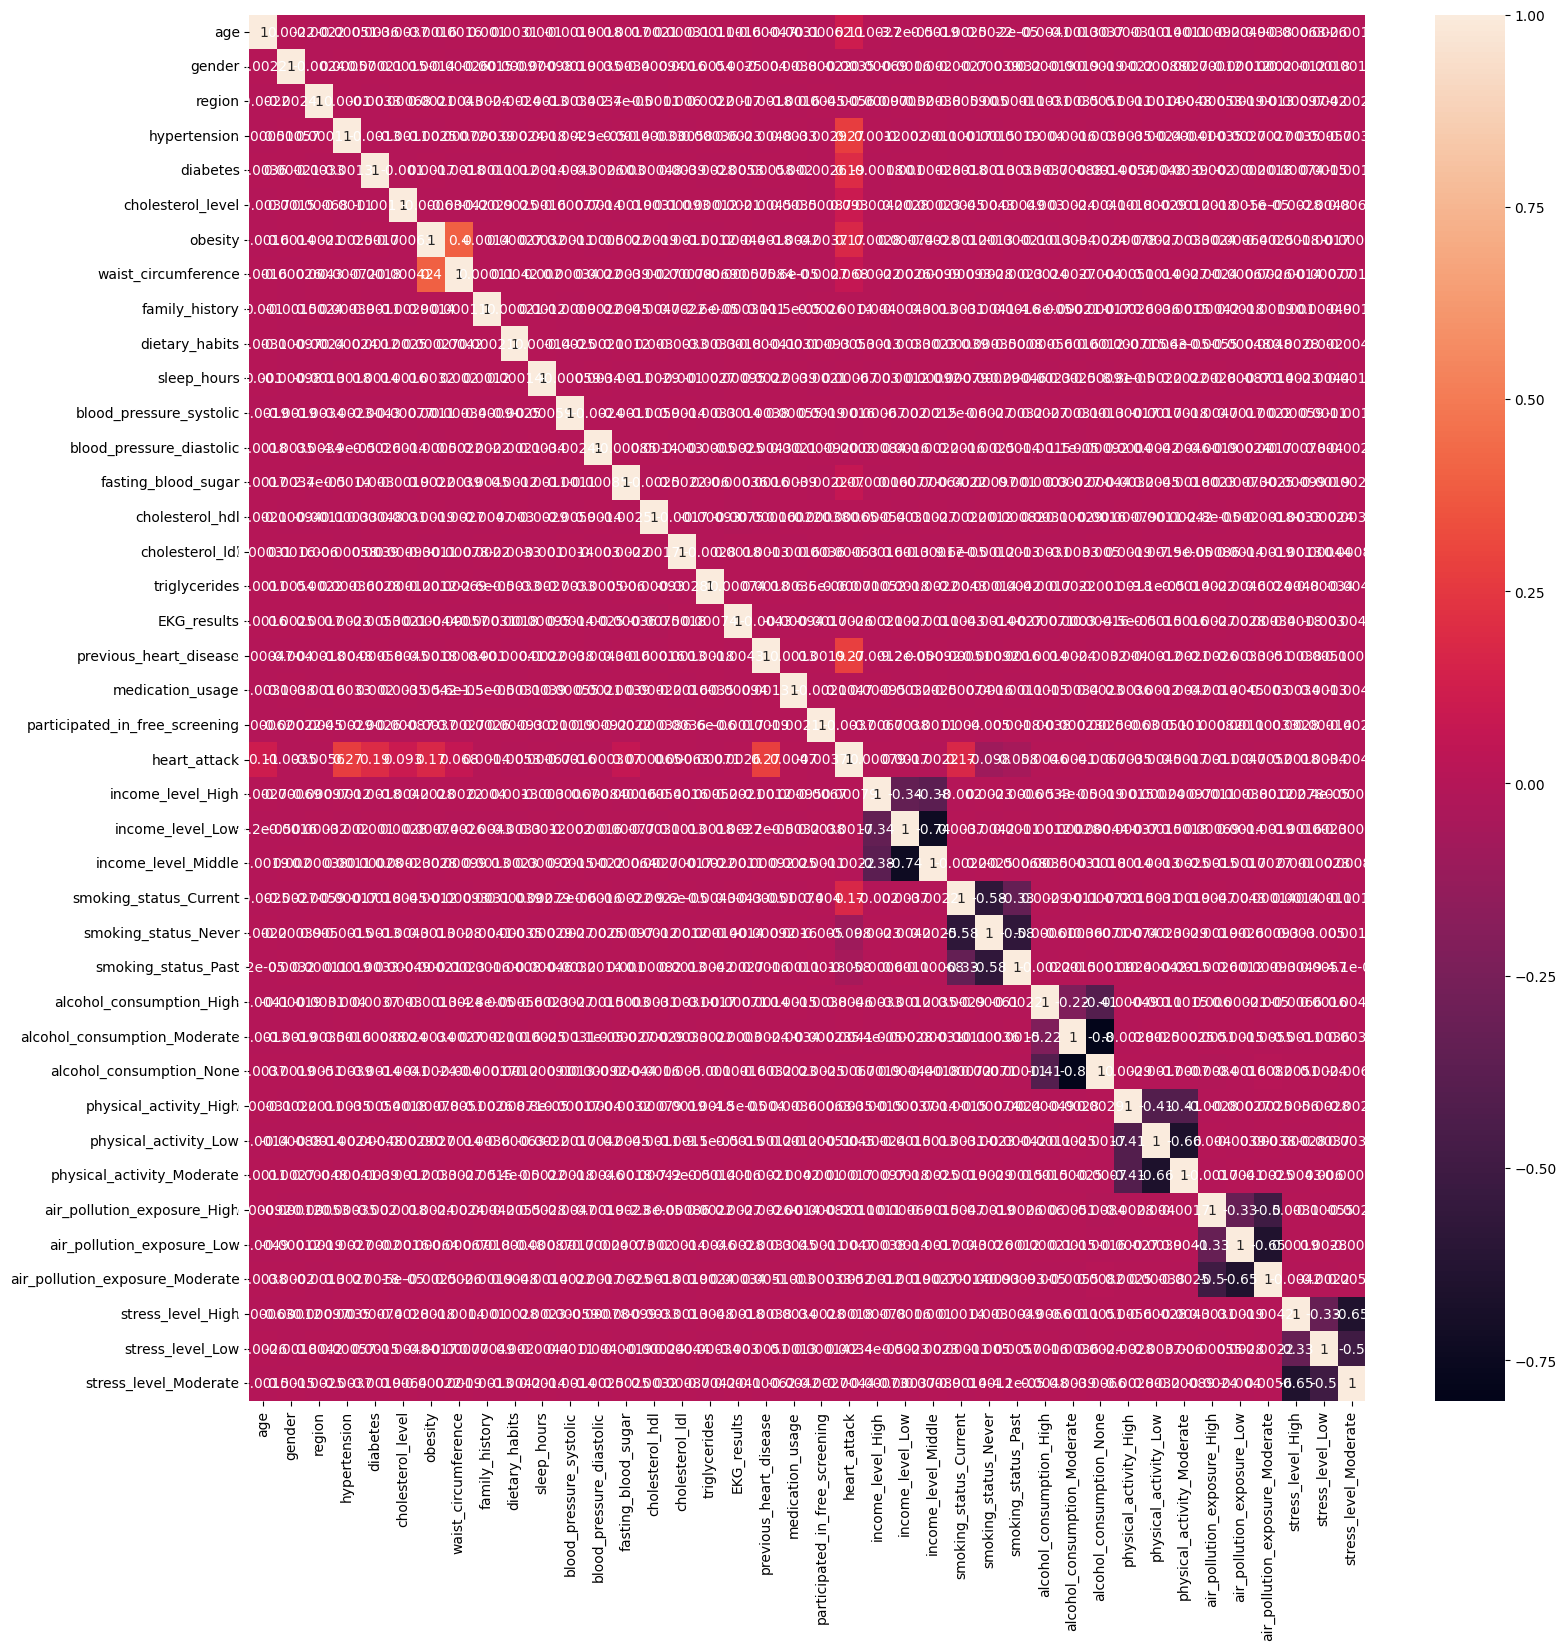

In [38]:
plt.figure(figsize = (18, 18))
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.show()

In [ ]:
df.to_csv("heart_attack_prediction_indonesia_transformed.csv", index = False)

Logistic Regression

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = df.drop(columns=["heart_attack"])  # Assuming 'heart_attack' is the target variable
y = df["heart_attack"].astype(int)  # Ensure it's an integer

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


Accuracy: 0.7308
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.83      0.79     18906
           1       0.70      0.59      0.64     12765

    accuracy                           0.73     31671
   macro avg       0.72      0.71      0.71     31671
weighted avg       0.73      0.73      0.73     31671



c:\Users\Shusma\Documents\Erasmus\TMDL\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Tree and Random Forest - no hyperparameter optimalization

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Separate target variables from features
y = df['heart_attack']  # Target variable
X = df.drop(columns=['heart_attack'])  # Features

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Evaluate models
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, dt_predictions))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions))


Decision Tree Accuracy: 0.6565627861450538
Random Forest Accuracy: 0.7313946512582489

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71     18906
           1       0.57      0.58      0.58     12765

    accuracy                           0.66     31671
   macro avg       0.64      0.64      0.64     31671
weighted avg       0.66      0.66      0.66     31671


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78     18906
           1       0.69      0.60      0.64     12765

    accuracy                           0.73     31671
   macro avg       0.72      0.71      0.71     31671
weighted avg       0.73      0.73      0.73     31671



Decision Tree hyperparameter

Next week we should split the data into test, training and validation for the hyperparameter optimisation.

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Perform randomized search
random_search = RandomizedSearchCV(dt, param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Best model
best_dt_model = random_search.best_estimator_


Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 11}


In [45]:
# Make predictions with the best model
dt_best_predictions = best_dt_model.predict(X_test)

# Evaluate the best model
print("Best Decision Tree Accuracy:", accuracy_score(y_test, dt_best_predictions))
print("\nBest Decision Tree Classification Report:\n", classification_report(y_test, dt_best_predictions))

Best Decision Tree Accuracy: 0.7368570616652458

Best Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79     18906
           1       0.70      0.61      0.65     12765

    accuracy                           0.74     31671
   macro avg       0.73      0.72      0.72     31671
weighted avg       0.73      0.74      0.73     31671



SVM with Grid Search

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define features and target variable
X = df.drop(columns=['heart_attack'])  # Independent variables
y = df['heart_attack']  # Dependent variable (target)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (SVM performs better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the hyperparameter grid for SVM
param_grid_svm = [
    {
        'kernel': ['linear', 'poly', 'rbf'],  # Types of kernels
        'C': [0.1, 1, 10, 100],  # Regularization parameter
        'degree': [2, 3, 4],  # Degree of the polynomial kernel (only for 'poly')
        'gamma': [0.01, 0.1, 1, 10]  # Gamma parameter (only for 'rbf' and 'poly')
    }
]

# Initialize SVM model
svm_model = SVC(probability=True)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train SVM with the best parameters
best_svm = SVC(**best_params, probability=True)
best_svm.fit(X_train, y_train)

# Make predictions
y_pred = best_svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nBest Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ValueError: could not convert string to float: 'Female'